In [113]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier #for regression use KneighborsRegressor
from sklearn.preprocessing import StandardScaler




In [114]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')

In [115]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [46]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [47]:
df.shape

(1599, 12)

In [48]:
# 11 independent variables and 1 target variable present in data 
# No Nulls present in data
# There may be outliers present as maximum values are very high as compared to 3rd quartile in many columns 
# Skewness will be present as standard deviation values are high 
# quality will be our target value and rest are all independent variable 
# In total sulphur dioxide and free sulphur dioxide column standard deviation are higher which means there is uneven distribution in data.




In [49]:
df.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1295,6.6,0.630,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.50,5
1127,6.3,0.760,0.00,2.9,0.072,26.0,52.0,0.99379,3.51,0.60,11.50,6
347,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.00,6
165,7.8,0.630,0.48,1.7,0.100,14.0,96.0,0.99610,3.19,0.62,9.50,5
107,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.99690,3.46,0.79,9.30,5
633,10.1,0.935,0.22,3.4,0.105,11.0,86.0,1.00100,3.43,0.64,11.30,4
1235,6.0,0.330,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.50,4
487,10.2,0.645,0.36,1.8,0.053,5.0,14.0,0.99820,3.17,0.42,10.00,6
1323,9.1,0.360,0.39,1.8,0.060,21.0,55.0,0.99495,3.18,0.82,11.00,7
1506,6.8,0.810,0.05,2.0,0.070,6.0,14.0,0.99562,3.51,0.66,10.80,6


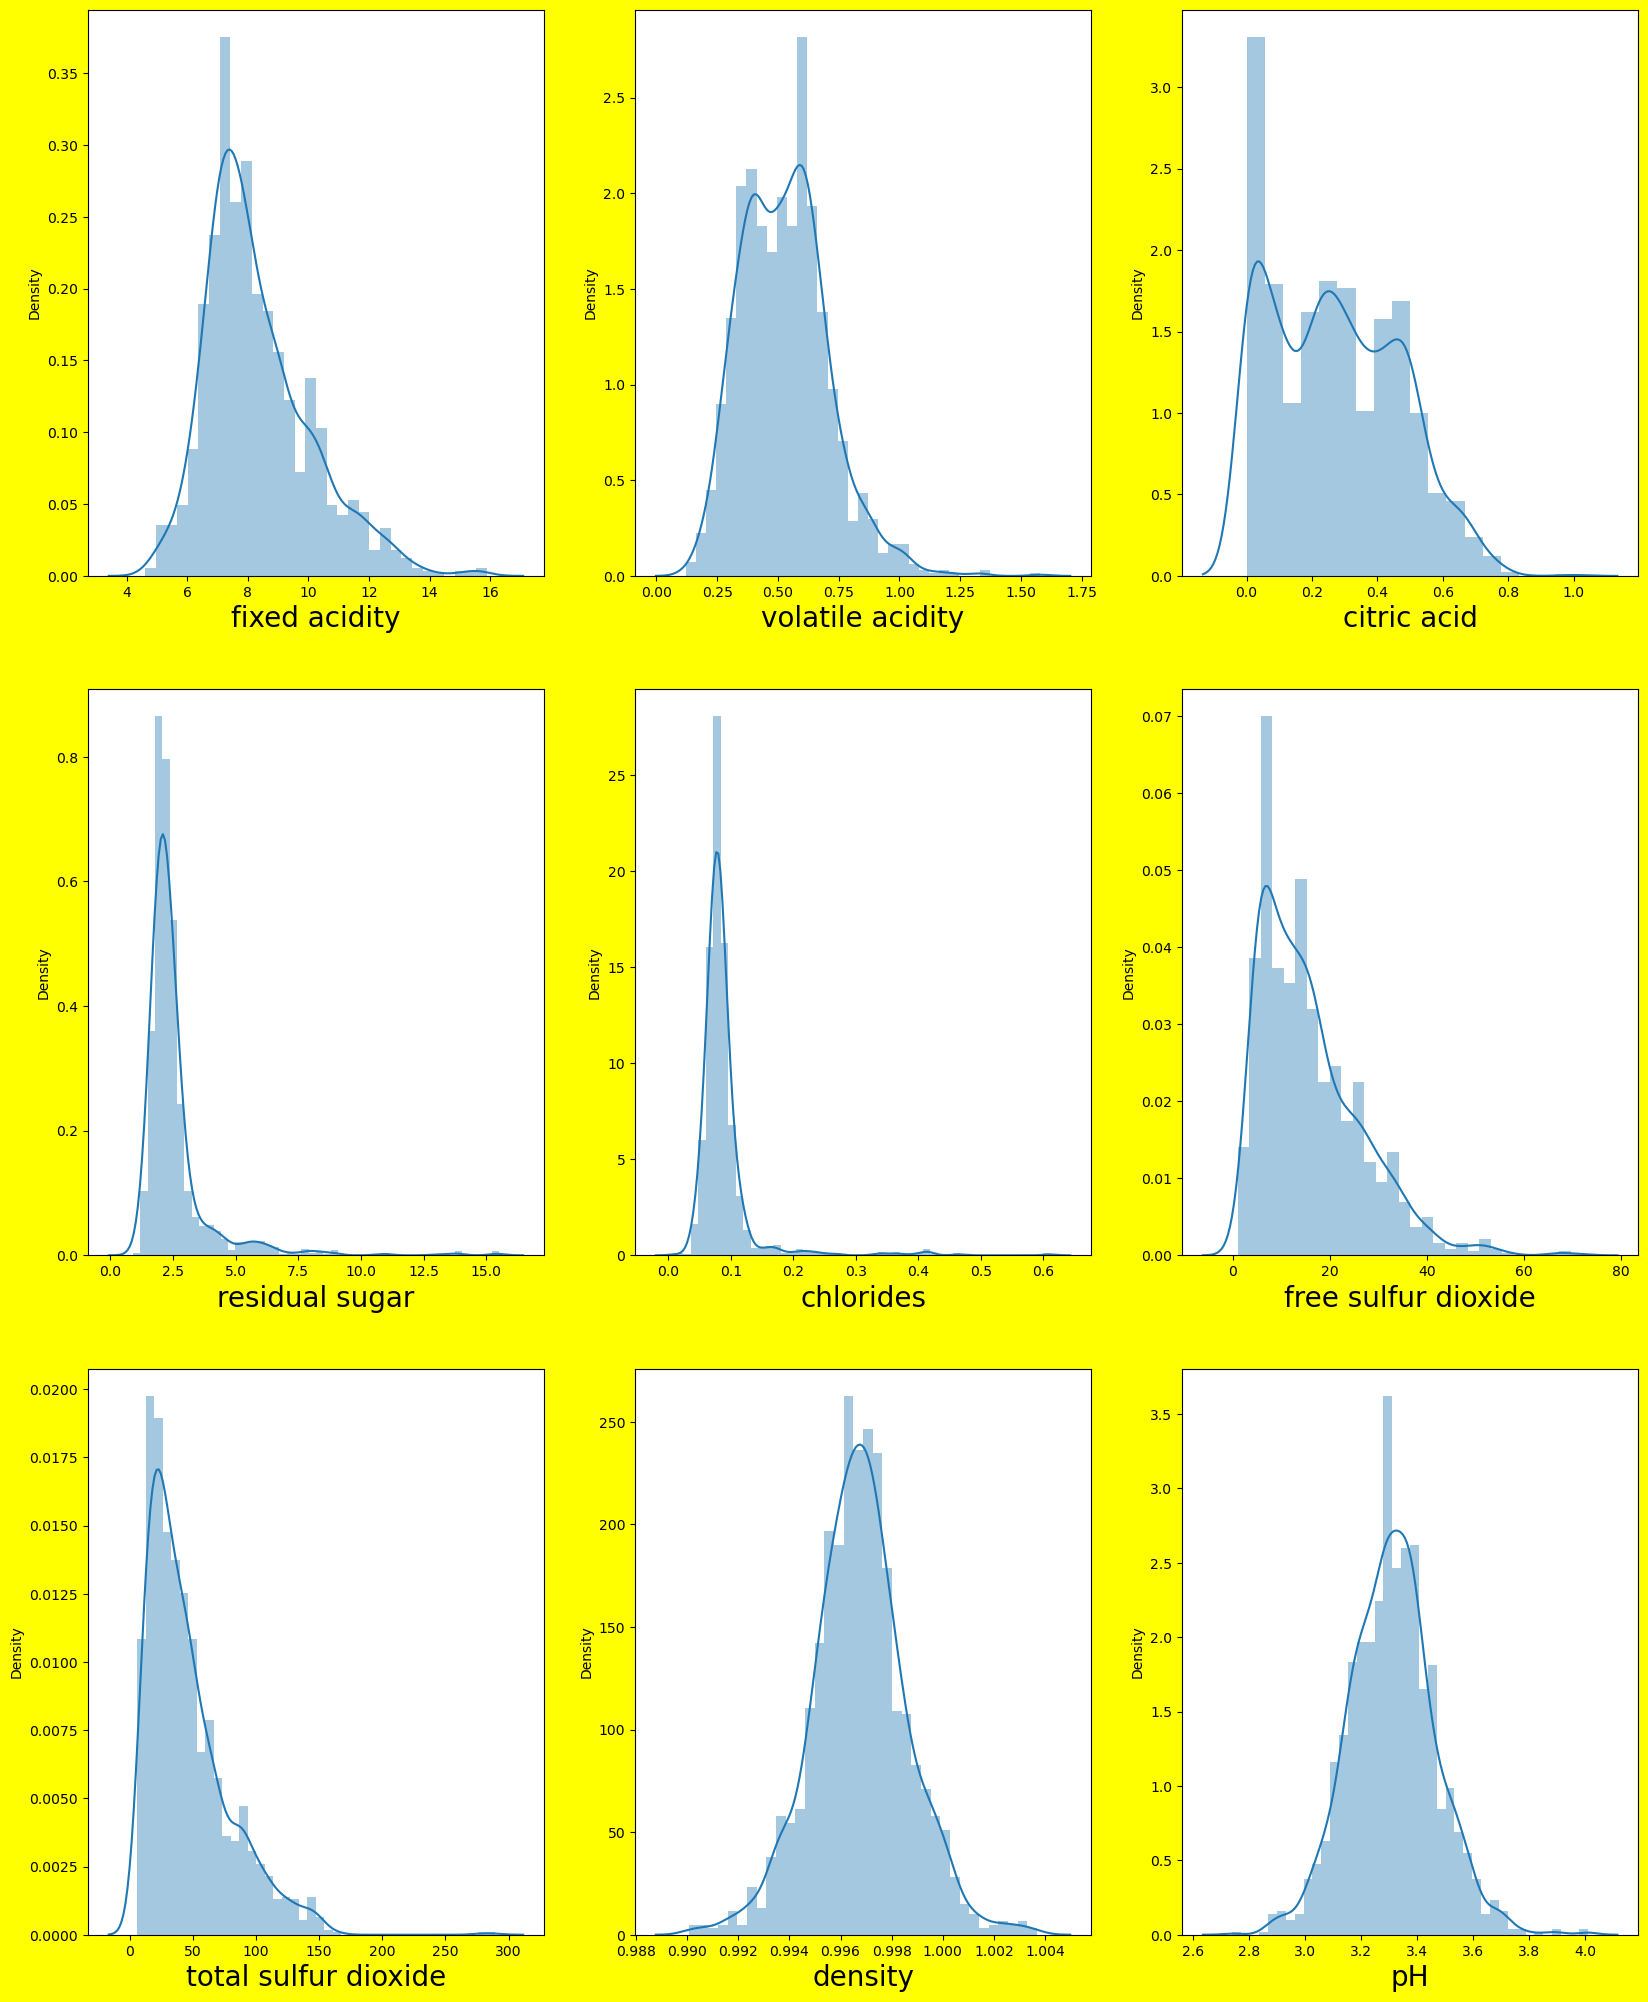

In [50]:
# let's see the data distribution 
plt.figure(figsize=(20,25),facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

In [51]:
# data is skewed towards right in residual sugar , chlorides,free sulphur dioxide,total sulphur dioxide
df_feature = df.drop('quality',axis=1)


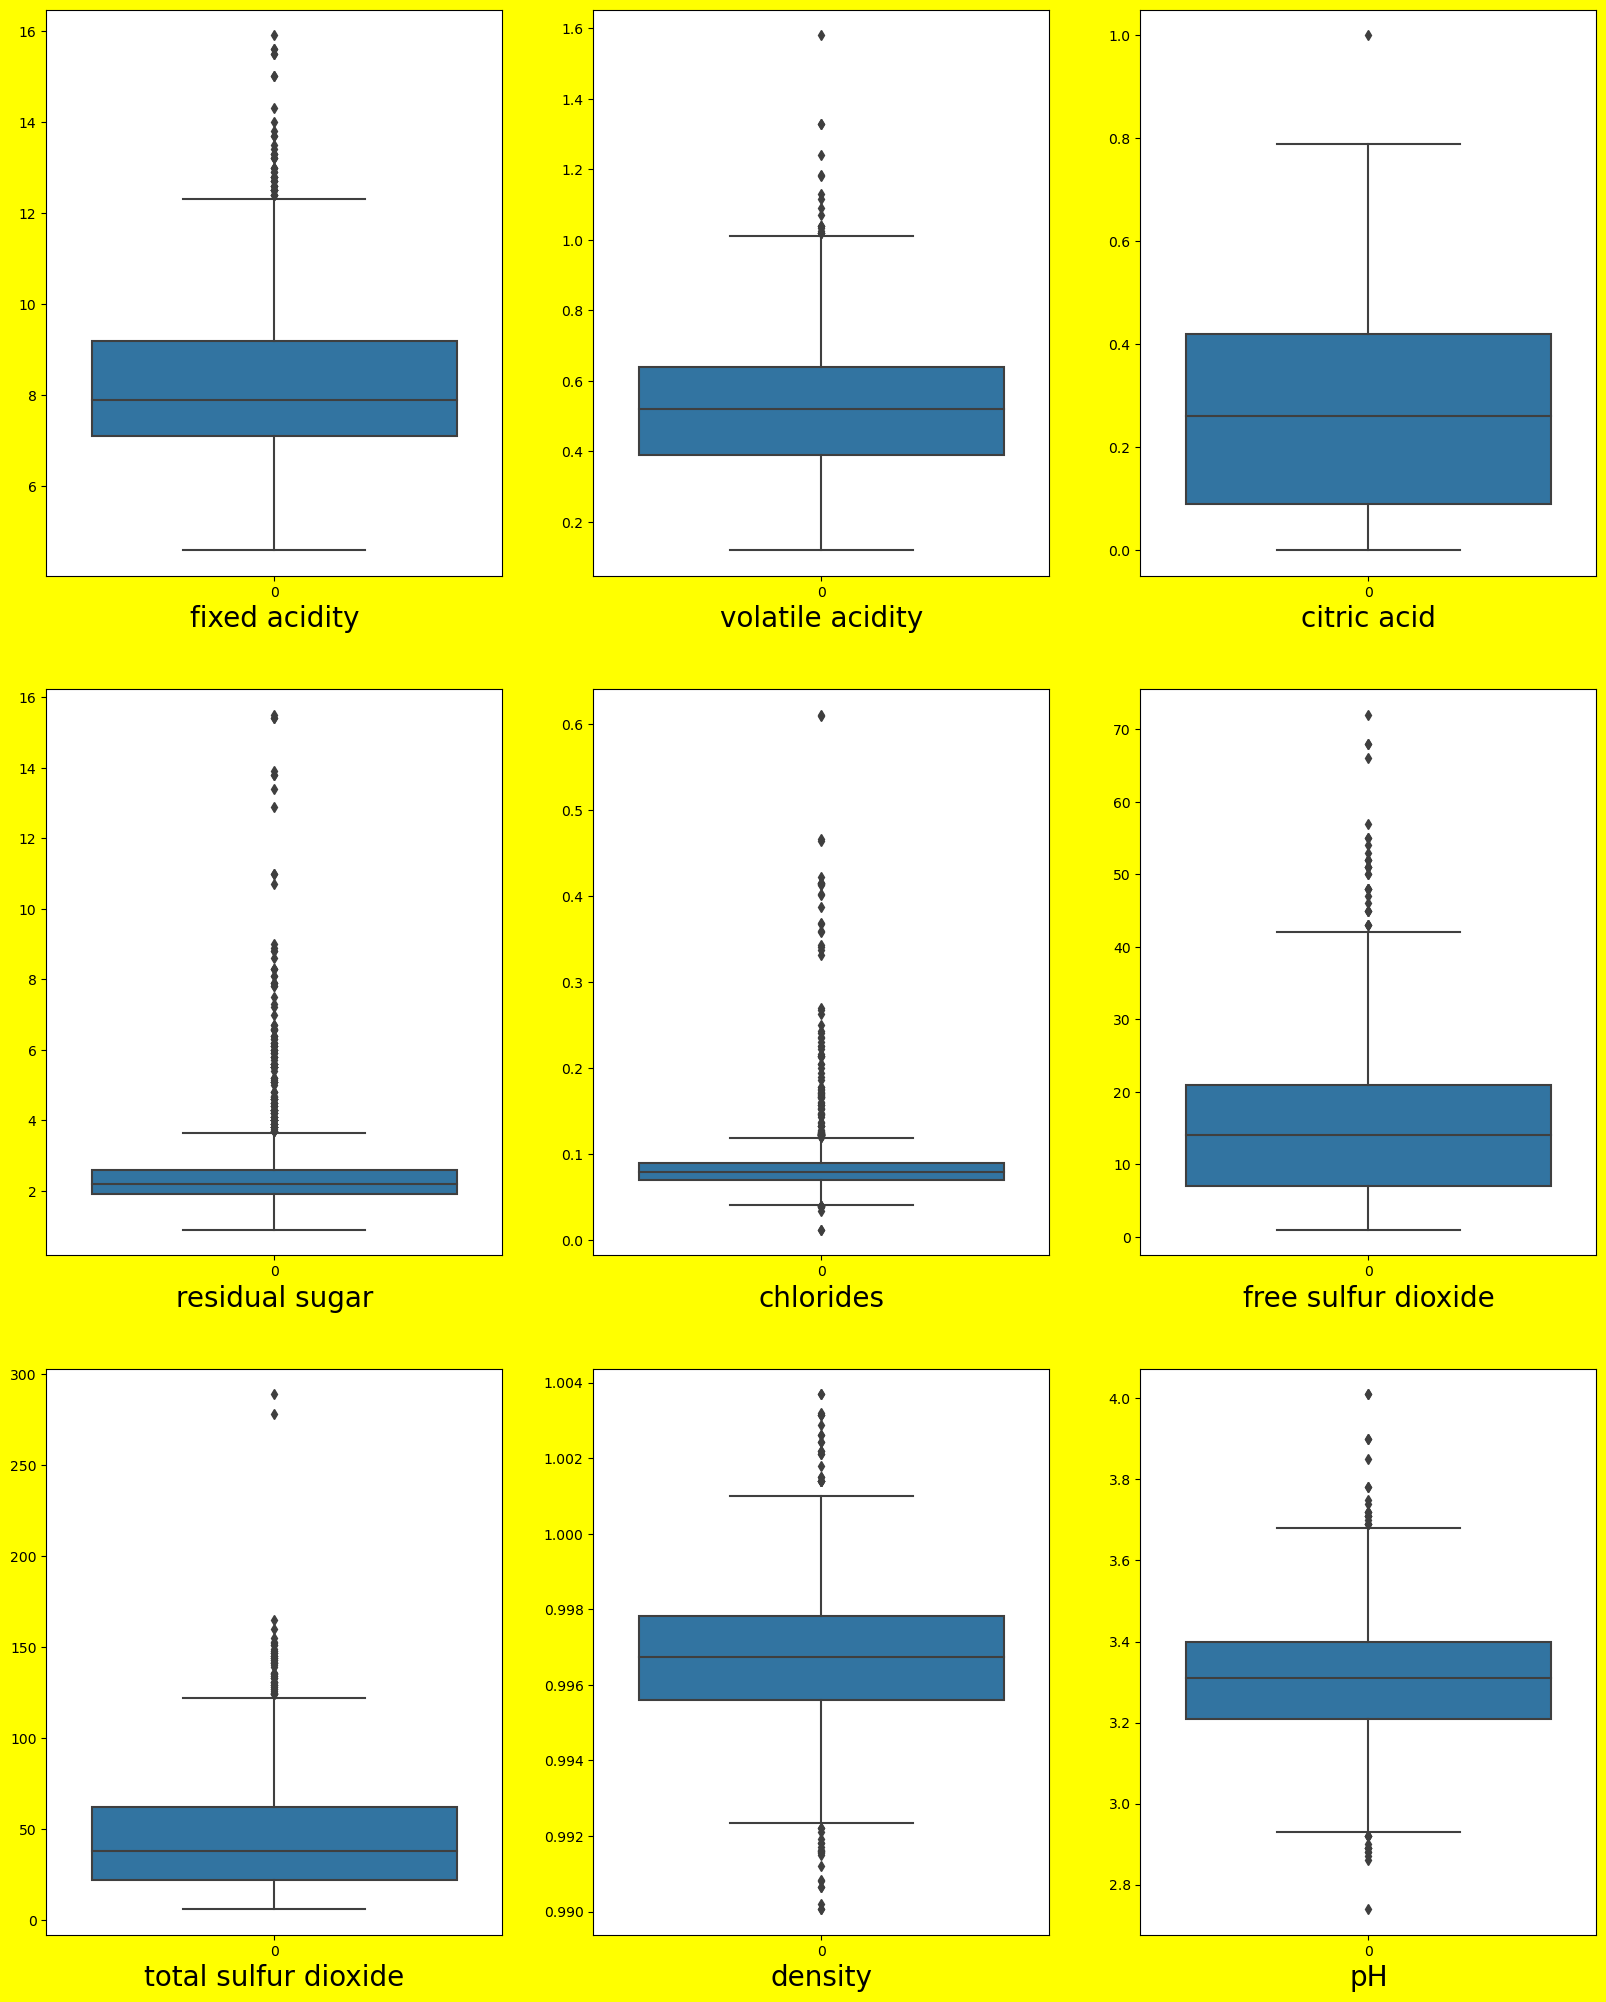

In [52]:
plt.figure(figsize=(20,25),facecolor = 'yellow')
graph = 1

for column in df_feature:
    if graph <= 9:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=20)
        
    graph +=1
plt.show()

In [53]:
# there are ouliers in every column as our data is small we will use data as it is 

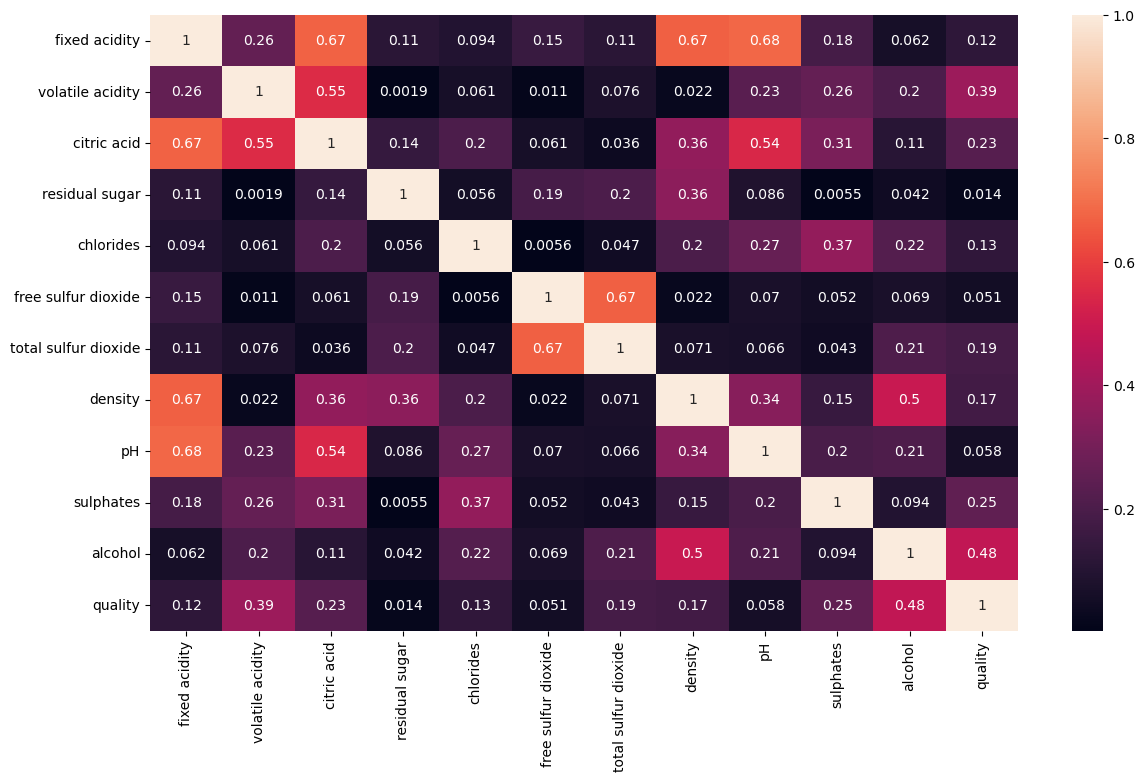

In [30]:
# let's check the multicollinearity between features 
df_corr = df.corr().abs() # this code will get the coefficient of one variable vs all other variable(relationship)

plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

In [28]:
# there is no feature strongly correlated with each other so we take all the features to build the model 

In [58]:
# if wine quality is 7 or above it is a good quality wine rest is bad quality 
df['goodquality']=[1 if x>=7 else 0 for x in df['quality']]
df.sample(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
849,6.4,0.630,0.21,1.60,0.080,12.0,32.0,0.99689,3.58,0.66,9.8,5,0
418,11.9,0.380,0.51,2.00,0.121,7.0,20.0,0.99960,3.24,0.76,10.4,6,0
1272,5.9,0.460,0.00,1.90,0.077,25.0,44.0,0.99385,3.50,0.53,11.2,5,0
175,6.9,0.500,0.04,1.50,0.085,19.0,49.0,0.99580,3.35,0.78,9.5,5,0
42,7.5,0.490,0.20,2.60,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6,0
608,10.1,0.650,0.37,5.10,0.110,11.0,65.0,1.00260,3.32,0.64,10.4,6,0
1220,10.9,0.320,0.52,1.80,0.132,17.0,44.0,0.99734,3.28,0.77,11.5,6,0
151,9.2,0.520,1.00,3.40,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4,0
947,8.3,0.280,0.48,2.10,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7,1
486,10.2,0.670,0.39,1.90,0.054,6.0,17.0,0.99760,3.17,0.47,10.0,5,0


In [59]:
# seperate dependent and independent variable 
x = df.drop(['quality','goodquality'],axis=1)
y = df['goodquality']

In [65]:
# counting sample column data to see data is balanced or not 
df['goodquality'].value_counts()

goodquality
0    1382
1     217
Name: count, dtype: int64

In [116]:
scalar= StandardScaler()
X_scalar = scalar.fit_transform(x)

In [117]:
# splitting the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20)

In [118]:
# can't able to use SMOTE as i think version or library not installed otherwise using SMOTE over sampling is needed 

In [119]:
!pip install imblearn

In [120]:
def metric_score (clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f"Accuracy score:{accuracy_score(y_train,y_pred) * 100:2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:2f}%")
        print (classification_report(y_test,pred,digits=2))# model confidence accuracy)

In [121]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [122]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [123]:
# call the function and pass the dataset to check the train and test score 
metric_score(clf,x_train,x_test,y_train,y_test,train=True) # this is for training score 

metric_score(clf,x_train,x_test,y_train,y_test,train = False) # this is for testing score 

Accuracy score:100.000000%
Accuracy score:88.750000%
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       416
           1       0.56      0.73      0.64        64

    accuracy                           0.89       480
   macro avg       0.76      0.82      0.78       480
weighted avg       0.90      0.89      0.89       480



In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [125]:
# hyper parameter tuning for decision tree model 
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(10,15), # maximum depth of the tree 
    'min_samples_leaf' : range(2,6),# The minimum number of samples required to be at leaf node 
    'min_samples_split' : range(3,8),# minimum number of samples required to split an internal node 
    'max_leaf_nodes' : range(5,15) # If none then unlimited number of leaf nodes
}


In [126]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)

In [127]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 15),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [128]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 3}


In [129]:
clf = DecisionTreeClassifier(criterion = 'gini',min_samples_split = 3,max_depth = 10,min_samples_leaf =5,max_leaf_nodes=10)

clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10, min_samples_leaf=5,
                       min_samples_split=3)

In [130]:
# call the function and pass the dataset to check the train and test score 
metric_score(clf,x_train,x_test,y_train,y_test,train=True) # this is for training score 

metric_score(clf,x_train,x_test,y_train,y_test,train = False) # this is for testing score 

Accuracy score:91.510277%
Accuracy score:87.500000%
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       416
           1       0.55      0.34      0.42        64

    accuracy                           0.88       480
   macro avg       0.73      0.65      0.68       480
weighted avg       0.86      0.88      0.86       480



In [131]:
# KNN model
# initiate KNeighbor classifier 
knn = KNeighborsClassifier()
# model training 
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [132]:
def metric_score (knn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = knn.predict(x_train)
        print(f"Accuracy score:{accuracy_score(y_train,y_pred) * 100:2f}%")
        
    elif train==False:
        pred = knn.predict(x_test)
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:2f}%")
        print (classification_report(y_test,pred,digits=2))# model confidence accuracy)

In [138]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True) # this is for training score 

metric_score(knn,x_train,x_test,y_train,y_test,train = False) # this is for testing score 

Accuracy score:90.080429%
Accuracy score:85.625000%
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       416
           1       0.43      0.25      0.32        64

    accuracy                           0.86       480
   macro avg       0.66      0.60      0.62       480
weighted avg       0.83      0.86      0.84       480



In [134]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [135]:
def metric_score (rf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = rf.predict(x_train)
        print(f"Accuracy score:{accuracy_score(y_train,y_pred) * 100:2f}%")
        
    elif train==False:
        pred = rf.predict(x_test)
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:2f}%")
        print (classification_report(y_test,pred,digits=2))# model confidence accuracy)

In [137]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True) # this is for training score 

metric_score(rf,x_train,x_test,y_train,y_test,train = False) # this is for testing score 

Accuracy score:100.000000%
Accuracy score:92.083333%
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       416
           1       0.75      0.61      0.67        64

    accuracy                           0.92       480
   macro avg       0.85      0.79      0.81       480
weighted avg       0.92      0.92      0.92       480

